# Scikit-Learn 

## Course Skip Quiz

The following questions are aimed at testing your understanding of the content that is covered within this course. There is no defined threshold where we believe you should attend the course if you score below. Rather it is aimed to make you engage with the content and reflect for yourself if you feel you would benefit from attending the course. Of note, is that the quiz is intended for you to use google throuhgout and engage with documentation. Even if you get all of the questions right, you are ofcourse more than welcome to still attend the course and use it as a refresher!

In [1]:
from jupyterquiz import display_quiz
display_quiz("../../questions/course_skip_quizes/scikitlearn_course_skip_quiz.json")

<IPython.core.display.Javascript object>

## Course

In [3]:
# import the packages used before and read in the required data
import pandas as pd
import matplotlib.pyplot as plt
air_pollution_data_2023_complete_dataset = pd.read_csv("data/LEED_air_pollution_monitoring_station_2023_complete_dataset.csv", index_col=0)
air_pollution_data_2023_complete_dataset = air_pollution_data_2023_complete_dataset.dropna()

In [4]:
# scikit learn can be imported with the the following command
import sklearn

### What is Scikit-Learn?

Scikit-Learn is a popular Python package that provides a set of algorithms and tools for machine learning that are both easy to use and effective. The package includes support for various tasks, including classification, regression, clustering, dimensionality reduction and model selection and normalization.

In scikit-learn the models that are avaliable include a massive number of possible arguements, and so for the purpose of this course the default arguements have been used. 




In [5]:
air_pollution_data_2023_complete_dataset["date"] = pd.to_datetime(air_pollution_data_2023_complete_dataset["date"], format="%d/%m/%Y %H:%M")
air_pollution_data_2023_complete_dataset["Hour"] = air_pollution_data_2023_complete_dataset["date"].dt.hour

In [6]:
display(air_pollution_data_2023_complete_dataset.head())

,date,NO2,O3,NO,Wind Speed,Temperature,site,Year,Hour
24664,2023-01-01 01:00:00,7.30306,76.61852,1.22702,4.9,7.2,Leeds Centre,2023.0,1
24665,2023-01-01 02:00:00,4.31351,79.67418,0.82507,7.0,7.5,Leeds Centre,2023.0,2
24666,2023-01-01 03:00:00,2.95539,81.50758,0.79333,7.3,7.3,Leeds Centre,2023.0,3
24667,2023-01-01 04:00:00,2.08340,81.45519,0.53947,7.2,7.2,Leeds Centre,2023.0,4
24669,2023-01-01 06:00:00,2.95643,82.71238,0.57120,6.8,7.1,Leeds Centre,2023.0,6


### Linear Regression
Linear regression is a simple model that is able to predict a dependent variable based on one or more independent variables, with the assumption of a linear relationship between the two. 

/Users/lb788/miniconda3/envs/CfRR/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


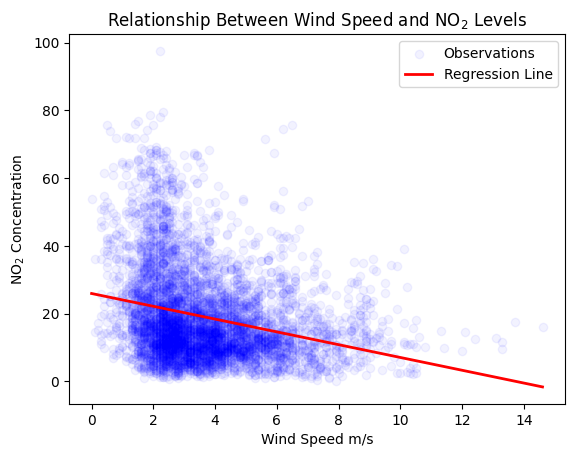

Intercept of the regression line: 25.91496846131205
Slope of the regression line: -1.8904584011013008


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create some simple data
X = air_pollution_data_2023_complete_dataset[["Wind Speed"]]
y = air_pollution_data_2023_complete_dataset[["NO2"]]

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Plotting the data points
plt.scatter(X, y, color='blue', label='Observations', alpha=0.05)

# Predicting the values to draw the regression line
# We use minimum and maximum values of X to cover the whole range of data
X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Making it a column vector
y_predict = model.predict(X_new)

# Plotting the regression line
plt.plot(X_new, y_predict, color='red', linewidth=2, label='Regression Line')

# Adding title and labels
plt.title('Relationship Between Wind Speed and NO$_2$ Levels')
plt.xlabel('Wind Speed m/s')
plt.ylabel('NO$_2$ Concentration')
plt.legend()

# Show the plot
plt.show()


# Extracting and printing the intercept and slope
intercept = model.intercept_
slope = model.coef_

print("Intercept of the regression line:", intercept[0])  # Intercept is usually an array with a single element
print("Slope of the regression line:", slope[0][0])  # Slope is an array of arrays, each containing one element per feature

In [9]:
from jupyterquiz import display_quiz
display_quiz("../../questions/scikitlearn_question_linear_regression_question.json")

<IPython.core.display.Javascript object>

### K-Means Clustering 
K-means clustering is a method for parritioning data into a specified number of clusters by minimizing the variance within each cluster.

In [10]:
from sklearn.cluster import KMeans
import numpy as np

# Set the number of clusters
k = 3  # Example number of clusters

# Create KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
clusters = kmeans.fit_predict(air_pollution_data_2023_complete_dataset[['NO2', 'Temperature']])

/Users/lb788/miniconda3/envs/CfRR/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/r7/wblx0jw96hz08nvjz9p3zsgr0000gp/T/ipykernel_68779/3890792038.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(air_pollution_data_2023_complete_dataset['cluster'].unique()))  # 'tab10' supports up to 10 unique categories


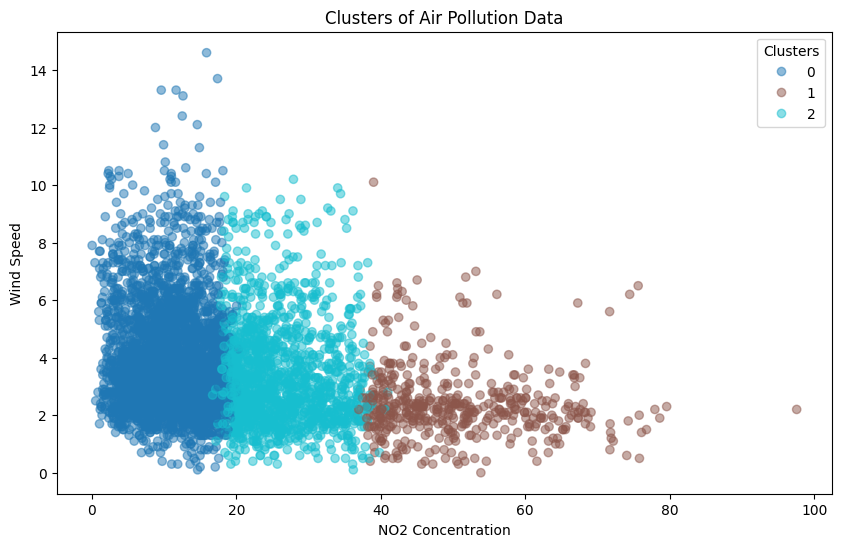

In [14]:
# Assuming 'clusters' has been added to your DataFrame
air_pollution_data_2023_complete_dataset['cluster'] = clusters

# Define a list of colors or use a colormap with discrete colors
colors = plt.cm.get_cmap('tab10', len(air_pollution_data_2023_complete_dataset['cluster'].unique()))  # 'tab10' supports up to 10 unique categories

# Plotting clusters categorically
plt.figure(figsize=(10, 6))
scatter = plt.scatter(air_pollution_data_2023_complete_dataset['NO2'], air_pollution_data_2023_complete_dataset['Wind Speed'], 
                      c=air_pollution_data_2023_complete_dataset['cluster'], cmap=colors, alpha=0.5)

plt.title('Clusters of Air Pollution Data')
plt.xlabel('NO2 Concentration')
plt.ylabel('Wind Speed')  # Adjusted to match the y-axis label with your data

# Create a legend for clusters
# Create handles and labels for the legend
handles, labels = scatter.legend_elements(prop='colors')
plt.legend(handles, labels, title="Clusters")

plt.show()


In [16]:
display_quiz("../../questions/sciktilearn_question_kmeans.json")

<IPython.core.display.Javascript object>

### Decision Tree Models
Decision Trees are a model framework that splits data into branches based on the some input data, in out case wind speed. The model resembles a tree structure with decision points and leaf nodes where each decision leads to further splits, eventually ending on a final prediction based on the input features.

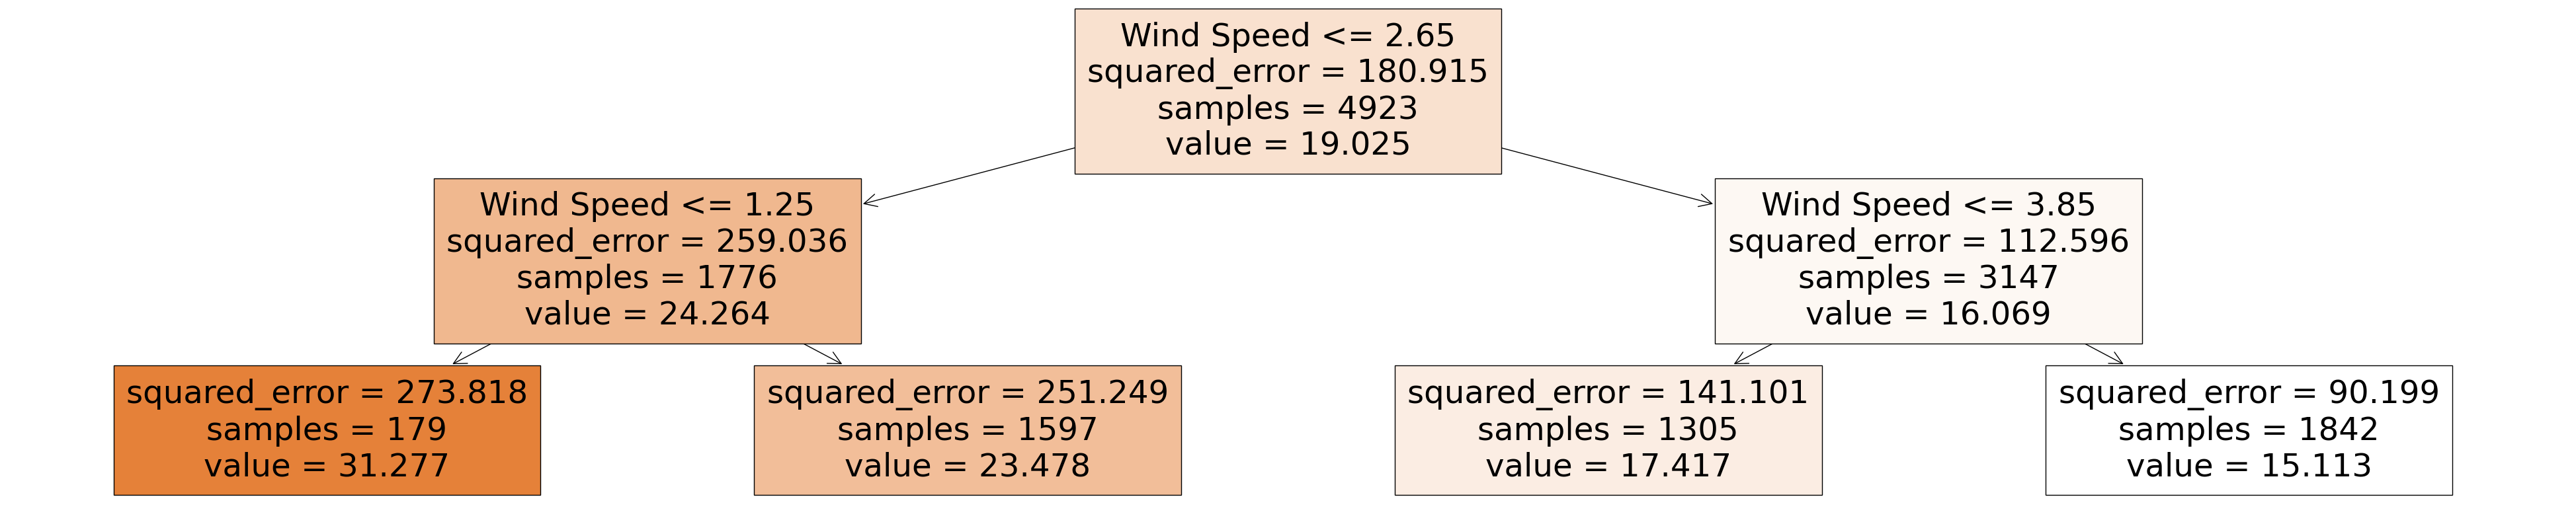

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
decision_tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=2)

# Train the model on the entire dataset
decision_tree_regressor.fit(air_pollution_data_2023_complete_dataset[["Wind Speed"]], air_pollution_data_2023_complete_dataset["NO2"])


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(50,10))
plot_tree(decision_tree_regressor, feature_names=['Wind Speed'], filled=True)
plt.show()

In [18]:
display_quiz("../../questions/sciktilearn_question_decision_tree.json")

<IPython.core.display.Javascript object>

### Further Models
This section of the course has only introducded a very small subset of models that are avaliable, alongside not diving into the different arguements that are avaliable. If you are interested in learning more about the models themselves, and key practical aspects of deploying and ensuring the validity of models you develop then please attend this couses next course "Introduction to Machine Learning"